### Real Estate Data: Property prices, sales volumes, rental yields (Zillow - API).
#### URL: https://www.zillow.com/research/data/
This Data Exploration Analysis evaluates data available on the **Home Values** endpoint.

HOME VALUES 
 - Zillow Home Value Index (ZHVI): A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. Available as a smoothed, seasonally adjusted measure and as a raw measure.

HOME VALUES FORECASTS
 - Zillow Home Value Forecast (ZHVF): A month-ahead, quarter-ahead and year-ahead forecast of the Zillow Home Value Index (ZHVI). ZHVF is created using the all homes, mid-tier cut of ZHVI and is available both raw and smoothed, seasonally adjusted.

RENTALS
 - Zillow Observed Rent Index (ZORI): A smoothed measure of the typical observed market rate rent across a given region.
 - Zillow Observed Renter Demand Index (ZORDI): A measure of the typical observed rental market engagement across a region.

FOR-SALE LISTINGS
 - For-Sale Inventory: The count of unique listings that were active at any time in a given month.
 - New Listings: Indicates how many new listings have come on the market in a given month.
 - Newly Pending Listings: The count of listings that changed from for-sale to pending status on Zillow.com in a given time period.
 - Median List Price: The median price at which homes across various geographies were listed.

SALES
 - The Sales Count Nowcast is the estimated number of unique properties that sold during the month after accounting for the latency between when sales occur and when they are reported. Available only for the raw cut of all homes.
 - Sale Price (median/mean): The price at which homes across various geographies were sold.
 - Total Transaction Value: The total dollar value of all homes sold in a given period (mean sale price x sales count)
 - Sale-to-List Ratio (mean/median): Ratio of sale vs. final list price.
 - Percent of Sales Below/Above List: Share of sales where sale price below/above the final list price; excludes homes sold for exactly the list price.

DAYS ON MARKET AND PRICE CUTS
 - Days to Pending: How long it takes homes in a region to change to pending status on Zillow.com after first being shown as for sale. The reported figure indicates the number of days (mean or median) that it took for homes that went pending during the week being reported, to go pending. This differs from the old “Days on Zillow” metric in that it excludes the in-contract period before a home sells.
 - Days to Close (mean/median): Number of days between the listing going pending and the sale date.
 - Share of Listings With a Price Cut: The number of unique properties with a list price at the end of the month that’s less than the list price at the beginning of the month, divided by the number of unique properties with an active listing at some point during the month.
 - Price Cuts: The mean and median price cut for listings in a given region during a given time period, expressed as both dollars ($) and as a percentage (%) of list price.

MARKET HEAT INDEX
 - Balance of for-sale supply and demand in a given market.  A higher number means the market is more tilted in favor of sellers. It relies on a combination of engagement and listing performance inputs to provide insights into current market dynamics. 

NEW CONSTRUCTION
 - New Construction Sales Count: The number of unique new construction homes that sold during the month. Available for the raw cut of single family residence and condo.
 - New Construction Median Sale Price: The median sale price at which new construction homes across various geographies were sold during the month.
 - New Construction Median Sale Price Per Sqft: The median sale price divided by square footage calculated over all new construction homes across various geographies were sold during the month.

In [18]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# SALES
## The Sales Count Nowcast is the estimated number of unique properties that 
## sold during the month after accounting for the latency between when sales 
## occur and when they are reported. Available only for the raw cut of all homes.
## Available by msa, Metro, only (e.g., Chicago, IL)
### url = 'https://files.zillowstatic.com/research/public_csvs/sales_count_now/Metro_sales_count_now_uc_sfrcondo_month.csv?t=1721079351'


### Single Family Home Values
**Zillow Home Value Index (ZHVI)**: 
A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. Available as a smoothed, seasonally adjusted measure and as a raw measure.

Zillow publishes top-tier ZHVI (dollar value, typical value for homes within the 65th to 95th percentile range for a given region) and bottom-tier ZHVI (dollar value, typical value for homes within the 5th to 35th percentile range for a given region).

Zillow also publishes ZHVI for all single-family residences (dollar value, typical value for all single-family homes in a given region), for condo/coops (dollar value), for all homes with 1, 2, 3, 4 and 5+ bedrooms (dollar value), and the ZHVI per square foot (dollar value, typical value of all homes per square foot calculated by taking the estimated home value for each home in a given region and dividing it by the home’s square footage).


In [19]:
# End points for Single Family Home Values in all available geographies
# Data is provided as csv
# refactor later
#url_zhvi_single_family_homes_by_metro_usa = 'https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv?t=1720392210'
#url_zhvi_single_family_homes_by_state = 'https://files.zillowstatic.com/research/public_csvs/zhvi/State_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv?t=1720392210'
url_zhvi_single_family_homes_by_county = 'https://files.zillowstatic.com/research/public_csvs/zhvi/County_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv?t=1720392210'
#url_zhvi_single_family_homes_by_city = 'https://files.zillowstatic.com/research/public_csvs/zhvi/City_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv?t=1720392210'
#url_zhvi_single_family_homes_by_zip = 'https://files.zillowstatic.com/research/public_csvs/zhvi/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv?t=1720392210'
#url_zhvi_single_family_homes_by_neighborhood = 'https://files.zillowstatic.com/research/public_csvs/zhvi/Neighborhood_zhvi_uc_sfr_sm_sa_month.csv?t=1720392210'


In [20]:
# Create DataFrames 
# These are organized from widest area, an MSA, down to a Neighborhood level
# refactor later
#zhvi_metro_usa_df = pd.read_csv(url_zhvi_single_family_homes_by_metro_usa)
#zhvi_state_df = pd.read_csv(url_zhvi_single_family_homes_by_state)
zhvi_county_df = pd.read_csv(url_zhvi_single_family_homes_by_county)
#zhvi_city_df = pd.read_csv(url_zhvi_single_family_homes_by_city)
#zhvi_zip_df = pd.read_csv(url_zhvi_single_family_homes_by_zip)
#zhvi_neighborhood_df = pd.read_csv(url_zhvi_single_family_homes_by_neighborhood)

In [21]:
# Review the columns
# Observed that 'RegionID' is likly a key for looking across the Geography
# Observed that Data is end of every from from 2020 to May 2024
# Cannot find definition for 'SizeRank' but assume it's related to the size of the Metro Region
#print(f"Metro: {zhvi_metro_usa_df.columns}")
#print('-----')
#print(f"State: {zhvi_state_df.columns}")
#print('-----')
print(f"County: {zhvi_county_df.columns}")
#print('-----')
#print(f"City: {zhvi_city_df.columns}")
#print('-----')
#print(f"Zip: {zhvi_zip_df.columns}")
#print('-----')
#print(f"Neighborhood: {zhvi_neighborhood_df.columns}")

County: Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS', '2000-01-31',
       ...
       '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
       '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30'],
      dtype='object', length=303)


In [22]:
zhvi_county_df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-02-29    float64
2024-03-31    float64
2024-04-30    float64
2024-05-31    float64
2024-06-30    float64
Length: 303, dtype: object

In [23]:
# look at County Data
print(zhvi_county_df.head())
#print(zhvi_county_df.tail())


   RegionID  SizeRank          RegionName RegionType StateName State  \
0      3101         0  Los Angeles County     county        CA    CA   
1       139         1         Cook County     county        IL    IL   
2      1090         2       Harris County     county        TX    TX   
3      2402         3     Maricopa County     county        AZ    AZ   
4      2841         4    San Diego County     county        CA    CA   

                                  Metro  StateCodeFIPS  MunicipalCodeFIPS  \
0    Los Angeles-Long Beach-Anaheim, CA              6                 37   
1    Chicago-Naperville-Elgin, IL-IN-WI             17                 31   
2  Houston-The Woodlands-Sugar Land, TX             48                201   
3             Phoenix-Mesa-Chandler, AZ              4                 13   
4    San Diego-Chula Vista-Carlsbad, CA              6                 73   

      2000-01-31  ...     2023-09-30     2023-10-31     2023-11-30  \
0  223227.570289  ...  908470.1641

### Group the zhvi_county_df DataFrame by 'State', 'Metro', and 'RegionName' and aggregate the data from 2010 to the most recent date

In [16]:
# Select only the specified columns
filtered_df = zhvi_county_df[['StateName', 'RegionName', 'Metro']]

# Filter the DataFrame to include only columns of type float
float_cols_df = zhvi_county_df.select_dtypes(include=['float64'])


Index(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31',
       ...
       '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
       '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30'],
      dtype='object', length=294)

In [35]:
# Convert columns to datetime for time series analysis
for col in float_cols_df.columns:
    float_cols_df[col] = pd.to_datetime(float_cols_df[col])


"""
for col in float_cols_df.columns:
    if pd.to_datetime(float_cols_df[col].name, errors='coerce') is not pd.NaT:
        float_cols_df[col] = pd.to_datetime(float_cols_df[col])


for col in float_cols_df.columns:
    try:
        # Attempt to convert each column to datetime
        if pd.to_datetime(float_cols_df[col].name, errors='coerce') is not pd.NaT:
            float_cols_df[col] = pd.to_datetime(float_cols_df[col])
    except Exception as e:
        # This block will catch columns that are not date formatted and skip them
        print(f"Skipping column {col}: {e}")
"""
# Normalize each datetime column to contain only the date part (no time component)
for col in float_cols_df.columns:
    float_cols_df[col] = pd.to_datetime(float_cols_df[col]).dt.normalize()

print(float_cols_df.dtypes)
print(float_cols_df.head())

2000-01-31    datetime64[ns]
2000-02-29    datetime64[ns]
2000-03-31    datetime64[ns]
2000-04-30    datetime64[ns]
2000-05-31    datetime64[ns]
                   ...      
2024-02-29    datetime64[ns]
2024-03-31    datetime64[ns]
2024-04-30    datetime64[ns]
2024-05-31    datetime64[ns]
2024-06-30    datetime64[ns]
Length: 294, dtype: object
  2000-01-31 2000-02-29 2000-03-31 2000-04-30 2000-05-31 2000-06-30  \
0 1970-01-01 1970-01-01 1970-01-01 1970-01-01 1970-01-01 1970-01-01   
1 1970-01-01 1970-01-01 1970-01-01 1970-01-01 1970-01-01 1970-01-01   
2 1970-01-01 1970-01-01 1970-01-01 1970-01-01 1970-01-01 1970-01-01   
3 1970-01-01 1970-01-01 1970-01-01 1970-01-01 1970-01-01 1970-01-01   
4 1970-01-01 1970-01-01 1970-01-01 1970-01-01 1970-01-01 1970-01-01   

  2000-07-31 2000-08-31 2000-09-30 2000-10-31  ... 2023-09-30 2023-10-31  \
0 1970-01-01 1970-01-01 1970-01-01 1970-01-01  ... 1970-01-01 1970-01-01   
1 1970-01-01 1970-01-01 1970-01-01 1970-01-01  ... 1970-01-01 1970-01-01   

In [36]:
# Merge the two DataFrames on their indices if they share the same row order
combined_df = pd.merge(filtered_df, float_cols_df, left_index=True, right_index=True)
combined_df.head()

,StateName,RegionName,Metro,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30
0,CA,Los Angeles County,"Los Angeles-Long Beach-Anaheim, CA",1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,...,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01
1,IL,Cook County,"Chicago-Naperville-Elgin, IL-IN-WI",1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,...,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01
2,TX,Harris County,"Houston-The Woodlands-Sugar Land, TX",1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,...,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01
3,AZ,Maricopa County,"Phoenix-Mesa-Chandler, AZ",1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,...,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01
4,CA,San Diego County,"San Diego-Chula Vista-Carlsbad, CA",1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,...,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01


In [17]:
# Make sure that 'State', 'Metro', and 'RegionName' are indeed columns in the DataFrame
#zhvi_county_df.reset_index(inplace=True)

# Confirm column names to avoid typos or misunderstandings
#print(zhvi_county_df.columns)

# Step 1: Filter columns for the date range from 2010 onwards
# Get all columns starting from '2010-01-31' to the most recent, assuming columns are already in date order
# Convert all column headers that are date strings to datetime objects where applicable
date_cols = [col for col in zhvi_county_df.columns if pd.to_datetime(col, errors='coerce') is not None and pd.to_datetime(col) >= pd.to_datetime('2010-01-31')]
relevant_columns = ['State', 'Metro', 'RegionName'] + date_cols
filtered_data = zhvi_county_df[relevant_columns]

# Group by 'State', 'Metro', 'RegionName' and calculate the mean of each date column
grouped_data = filtered_data.groupby(['State', 'Metro', 'RegionName']).mean()

# Reset the index to move 'State', 'Metro', and 'RegionName' back to columns
grouped_df = grouped_data.reset_index()

grouped_df.head()


DateParseError: Unknown datetime string format, unable to parse: RegionID, at position 0

In [16]:
# Group by 'State', 'Metro', and 'RegionName'
# For each group, calculate the mean of each date column
grouped_data = filtered_data.groupby(['State', 'Metro', 'RegionName']).mean()

# Transform the grouped data back into a DataFrame with columns:
grouped_df = grouped_data.reset_index()

print(grouped_df.head(20))


ValueError: Grouper for 'State' not 1-dimensional

In [20]:
# filtering for 10years of annual data spanning Covid.
# Dropping SizeRank
# Keeping Region Id for future drill-downs
my_county_df = zhvi_county_df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS',]]

#my_metro_df.info()

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS'],
      dtype='object')

In [ ]:
# Getting rid of the long decimal places to keep the display more readable
date_columns = my_metro_df.columns[2:]
for column in date_columns:
    my_metro_df[column] = my_metro_df[column].round(2)

my_metro_df

/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_80326/4856811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_metro_df[column] = my_metro_df[column].round(2)


,RegionID,RegionName,2015-05-31,2016-05-31,2017-05-31,2018-05-31,2019-05-31,2020-05-31,2021-05-31,2022-05-31,2023-05-31,2024-05-31
0,102001,United States,190697.69,202862.33,214938.34,228813.41,240732.39,253890.57,292029.59,342801.83,346505.58,361498.20
1,394913,"New York, NY",404291.83,424362.90,444471.71,464566.72,487695.64,508423.29,561297.46,617243.48,630810.98,679213.74
2,753899,"Los Angeles, CA",550075.76,576366.67,619566.64,672959.52,685526.16,723153.97,822964.76,970250.29,926116.77,1012932.00
3,394463,"Chicago, IL",204668.22,215964.61,228258.76,239987.53,246571.42,251987.79,280791.97,312628.10,315207.05,338583.50
4,394514,"Dallas, TX",183594.52,206196.95,228290.34,248230.57,257027.56,266084.40,304548.56,380845.11,378330.99,383988.56
...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,"Zapata, TX",110454.30,111009.30,114818.28,119354.31,122288.05,129088.92,144549.55,143375.47,126706.61,120172.60
891,394743,"Ketchikan, AK",295624.62,303423.46,316023.34,336280.41,354757.60,377110.61,404877.66,426913.08,428464.06,422697.02
892,753874,"Craig, CO",159913.92,161325.27,164733.07,170950.81,180412.21,194265.83,216859.60,254454.02,276399.65,289803.51
893,395188,"Vernon, TX",68419.06,68121.19,67628.93,72610.50,75167.79,80230.95,88750.13,98619.41,97160.82,92232.18


In [ ]:
# Calculate the percent change
# Assume Pre-Covid is 2015 to 2020; Post-Covid is 2021 to 2024
# refactor this later
my_metro_df['10yr_Change'] = ((my_metro_df['2024-05-31'] - my_metro_df['2015-05-31']) / my_metro_df['2015-05-31']) * 100
my_metro_df['Pre-Covid'] = ((my_metro_df['2020-05-31'] - my_metro_df['2015-05-31']) / my_metro_df['2015-05-31']) * 100
my_metro_df['Post-Covid'] = ((my_metro_df['2024-05-31'] - my_metro_df['2021-05-31']) / my_metro_df['2021-05-31']) * 100

# Round the result to 2 decimal places
my_metro_df['10yr_Change'] = my_metro_df['10yr_Change'].round(2)
my_metro_df['Pre-Covid'] = my_metro_df['Pre-Covid'].round(2)
my_metro_df['Post-Covid'] = my_metro_df['Post-Covid'].round(2)

# Display top 10 in the updated DataFrame
my_metro_df.head(10)

/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_80326/3839987674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_metro_df['10yr_Change'] = ((my_metro_df['2024-05-31'] - my_metro_df['2015-05-31']) / my_metro_df['2015-05-31']) * 100
/var/folders/h3/xtqxxtn9551c8dd44chd8lbc0000gn/T/ipykernel_80326/3839987674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_metro_df['Pre-Covid'] = ((my_metro_df['2020-05-31'] - my_metro_df['2015-05-31']) / my_metro_df['2015-05-31']) * 100
/var/folders/h3/

,RegionID,RegionName,2015-05-31,2016-05-31,2017-05-31,2018-05-31,2019-05-31,2020-05-31,2021-05-31,2022-05-31,2023-05-31,2024-05-31,10yr_Change,Pre-Covid,Post-Covid
0,102001,United States,190697.69,202862.33,214938.34,228813.41,240732.39,253890.57,292029.59,342801.83,346505.58,361498.20,89.57,33.14,23.79
1,394913,"New York, NY",404291.83,424362.90,444471.71,464566.72,487695.64,508423.29,561297.46,617243.48,630810.98,679213.74,68.00,25.76,21.01
2,753899,"Los Angeles, CA",550075.76,576366.67,619566.64,672959.52,685526.16,723153.97,822964.76,970250.29,926116.77,1012932.00,84.14,31.46,23.08
3,394463,"Chicago, IL",204668.22,215964.61,228258.76,239987.53,246571.42,251987.79,280791.97,312628.10,315207.05,338583.50,65.43,23.12,20.58
4,394514,"Dallas, TX",183594.52,206196.95,228290.34,248230.57,257027.56,266084.40,304548.56,380845.11,378330.99,383988.56,109.15,44.93,26.08
5,394692,"Houston, TX",186041.03,198408.84,205824.73,213650.32,222794.82,229930.62,257142.07,308028.30,309379.26,314770.36,69.19,23.59,22.41
6,395209,"Washington, DC",395983.48,405636.66,420186.80,434420.79,449416.78,468362.75,528413.32,579569.95,572341.66,601804.80,51.98,18.28,13.89
7,394974,"Philadelphia, PA",212087.20,219978.66,229723.80,240691.56,249389.82,263865.26,300445.46,333116.14,343708.11,369409.39,74.18,24.41,22.95
8,394856,"Miami, FL",255514.81,280001.27,302423.40,323394.16,338468.37,354281.01,400281.05,499370.32,530412.49,574364.92,124.79,38.65,43.49
9,394347,"Atlanta, GA",177035.24,192127.20,206626.59,224868.02,241170.18,254779.21,298088.56,374379.10,376856.32,393670.38,122.37,43.91,32.06


In [ ]:
# Sorting the DataFrame by % Change in descending order and assigning to a df
# look into refactoring in the future
my_metro_10yr_df = my_metro_df.sort_values('10yr_Change', ascending=False)
my_metro_pre_covid_df = my_metro_df.sort_values('Pre-Covid', ascending=False)
my_metro_post_covid_df = my_metro_df.sort_values('Post-Covid', ascending=False)

# Resetting the index of the DataFrame and dropping the old index
my_metro_10yr_df = my_metro_10yr_df.reset_index(drop=True)
my_metro_pre_covid_df = my_metro_pre_covid_df.reset_index(drop=True)
my_metro_post_covid_df = my_metro_post_covid_df.reset_index(drop=True)

# Displaying Top ranked
print(my_metro_10yr_df[['RegionID', 'RegionName', '10yr_Change', 'Pre-Covid', 'Post-Covid']].head(5))
print("-----")
print(my_metro_pre_covid_df[['RegionID', 'RegionName', '10yr_Change', 'Pre-Covid', 'Post-Covid']].head(5))
print("-----")
print(my_metro_post_covid_df[['RegionID', 'RegionName', '10yr_Change', 'Pre-Covid', 'Post-Covid']].head(5))

#print(my_metro_pre_covid_df.head(10))
#print(my_metro_post_covid_df.head(10))

   RegionID         RegionName  10yr_Change  Pre-Covid  Post-Covid
0    394476      Clewiston, FL       212.57      74.13       51.20
1    394892  Mountain Home, ID       178.61      74.07       19.76
2    394934     Okeechobee, FL       176.82      65.88       45.24
3    394335        Arcadia, FL       174.26      68.27       37.67
4    395154      Thomaston, GA       163.29      49.33       42.38
-----
   RegionID     RegionName  10yr_Change  Pre-Covid  Post-Covid
0    394431   Cadillac, MI       148.55      90.54       18.56
1    395105   Somerset, KY       133.61      86.51       10.49
2    394535      Dixon, IL       141.46      82.57       16.04
3    394786  Lewisburg, TN       158.33      77.60       24.63
4    394592    Fernley, NV       135.15      77.23       12.79
-----
   RegionID      RegionName  10yr_Change  Pre-Covid  Post-Covid
0    394901      Naples, FL       105.80      13.89       55.84
1    394476   Clewiston, FL       212.57      74.13       51.20
2    394713     

In [ ]:
# sorting and grouping function for convenience
# look to refactor to add year selection
def sort_and_select(dataframe, column, n, ascending=False):
    sorted_df = dataframe.sort_values(by=column, ascending=ascending).head(n)
    sorted_df = sorted_df.reset_index(drop=True)
    return sorted_df.drop(columns=['RegionID','10yr_Change', 'Pre-Covid', 'Post-Covid'])

# Sorting for plotting
top_10yr_change = sort_and_select(my_metro_df, '10yr_Change', 5)
bottom_10yr_change = sort_and_select(my_metro_df, '10yr_Change', 5, True)

top_pre_covid = sort_and_select(my_metro_df, 'Pre-Covid', 5)
top_pre_covid = top_pre_covid.drop(columns=['2021-05-31', '2022-05-31', '2023-05-31',
       '2024-05-31'])
bottom_pre_covid = sort_and_select(my_metro_df, 'Pre-Covid', 5, True)
bottom_pre_covid = bottom_pre_covid.drop(columns=['2021-05-31', '2022-05-31', '2023-05-31',
       '2024-05-31'])

top_post_covid = sort_and_select(my_metro_df, 'Post-Covid', 5)
top_post_covid = top_post_covid.drop(columns=['2015-05-31', '2016-05-31', '2017-05-31', '2018-05-31',
       '2019-05-31', '2020-05-31'])
bottom_post_covid = sort_and_select(my_metro_df, 'Post-Covid', 5, True)
bottom_post_covid = bottom_post_covid.drop(columns=['2015-05-31', '2016-05-31', '2017-05-31', '2018-05-31',
       '2019-05-31', '2020-05-31'])

# Display columns to see if it works
top_pre_covid.columns

Index(['RegionName', '2015-05-31', '2016-05-31', '2017-05-31', '2018-05-31',
       '2019-05-31', '2020-05-31'],
      dtype='object')

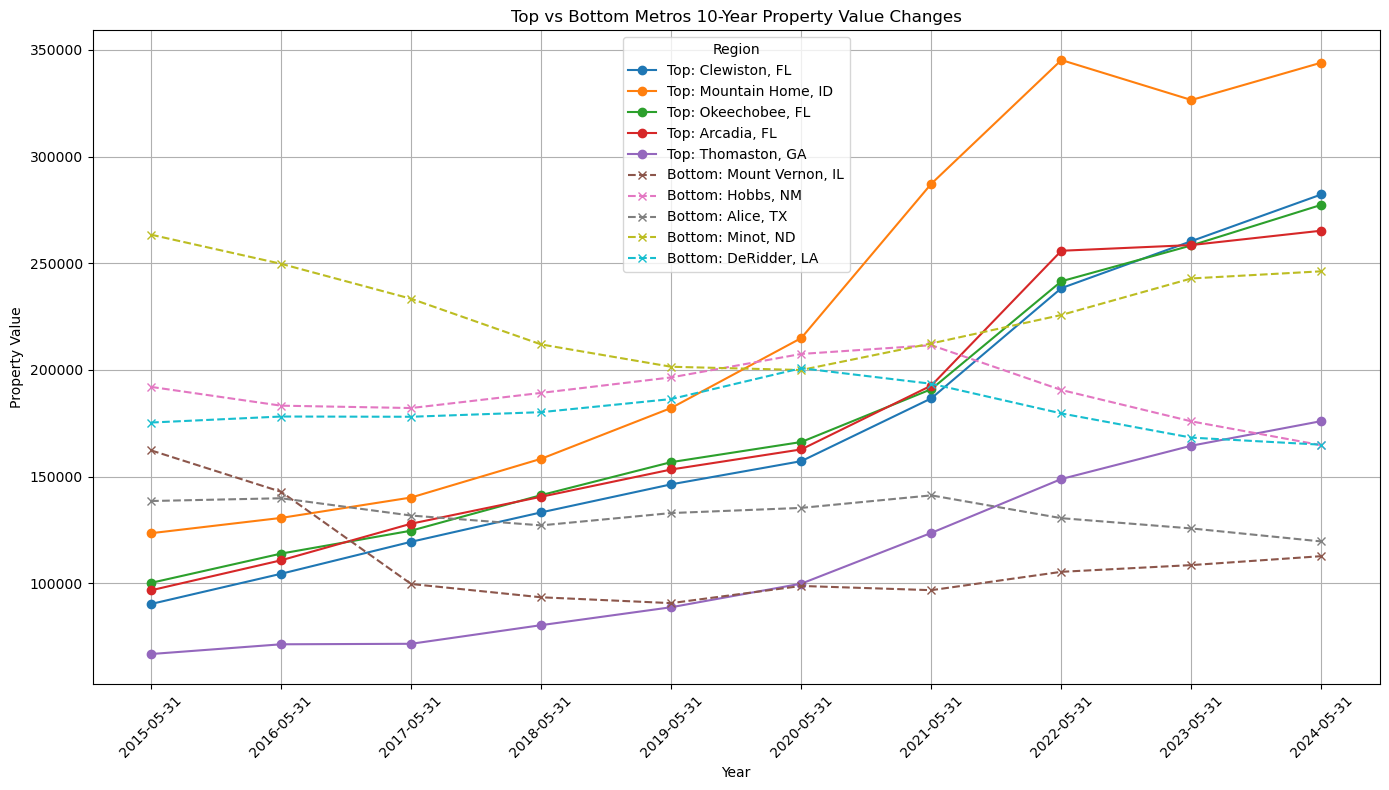

In [ ]:
# Display biggest changes in values in 10 years

# Preparing the data for plotting
top_plot_data = top_10yr_change.set_index('RegionName').transpose()
bottom_plot_data = bottom_10yr_change.set_index('RegionName').transpose()

# Creating the plot
plt.figure(figsize=(14, 8))

# Plotting top 10 year change metros
for column in top_plot_data.columns:
    plt.plot(top_plot_data.index, top_plot_data[column], marker='o', label=f'Top: {column}')

# Plotting bottom 10 year change metros
for column in bottom_plot_data.columns:
    plt.plot(bottom_plot_data.index, bottom_plot_data[column], marker='x', linestyle='--', label=f'Bottom: {column}')

plt.title('Top vs Bottom Metros 10-Year Property Value Changes')
plt.xlabel('Year')
plt.ylabel('Property Value')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

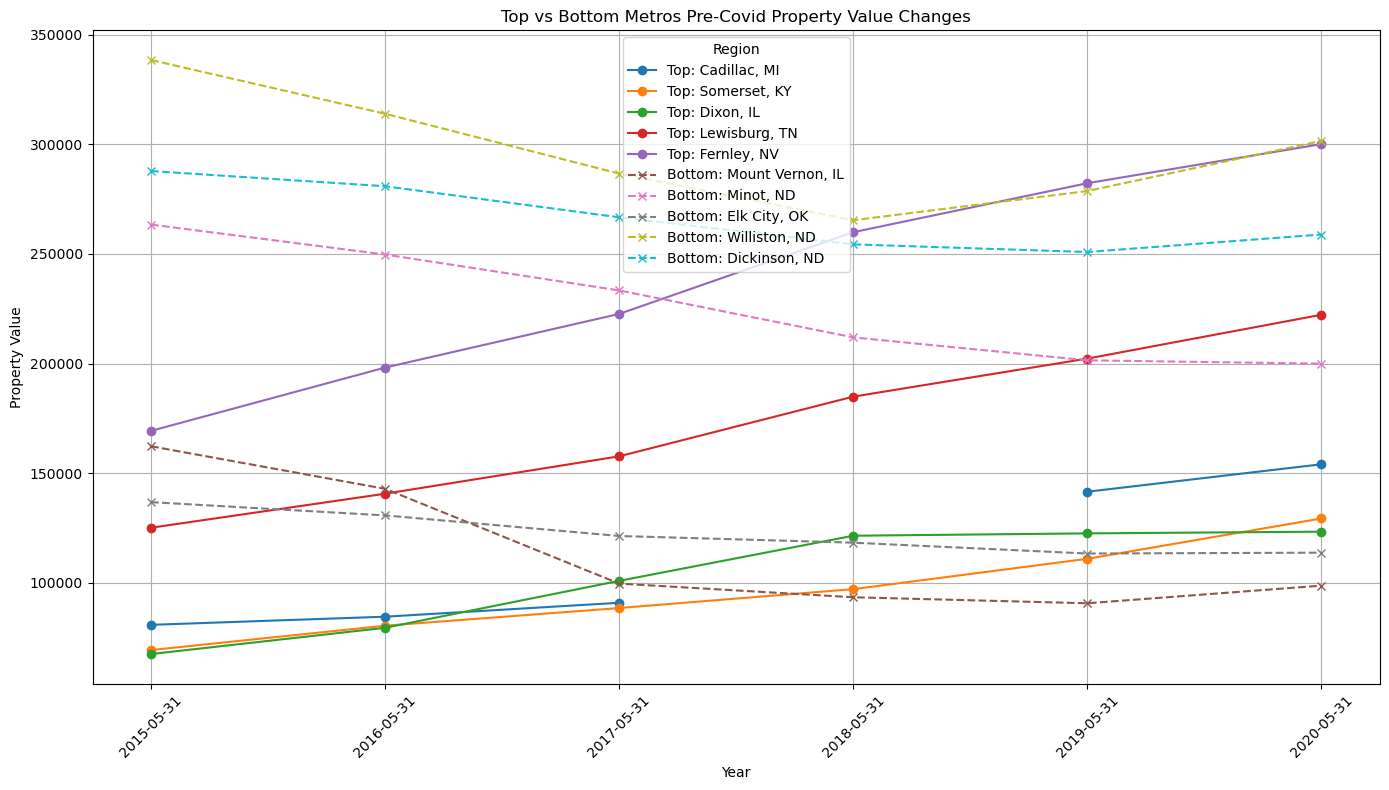

In [ ]:
# Display biggest changes in values pre-covid (2015 to 2020)

# Preparing the data for plotting
top_plot_data = top_pre_covid.set_index('RegionName').transpose()
bottom_plot_data = bottom_pre_covid.set_index('RegionName').transpose()

# Creating the plot
plt.figure(figsize=(14, 8))

# Plotting top Pre-Covid change metros
for column in top_plot_data.columns:
    plt.plot(top_plot_data.index, top_plot_data[column], marker='o', label=f'Top: {column}')

# Plotting bottom Pre-Covid change metros
for column in bottom_plot_data.columns:
    plt.plot(bottom_plot_data.index, bottom_plot_data[column], marker='x', linestyle='--', label=f'Bottom: {column}')

plt.title('Top vs Bottom Metros Pre-Covid Property Value Changes')
plt.xlabel('Year')
plt.ylabel('Property Value')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

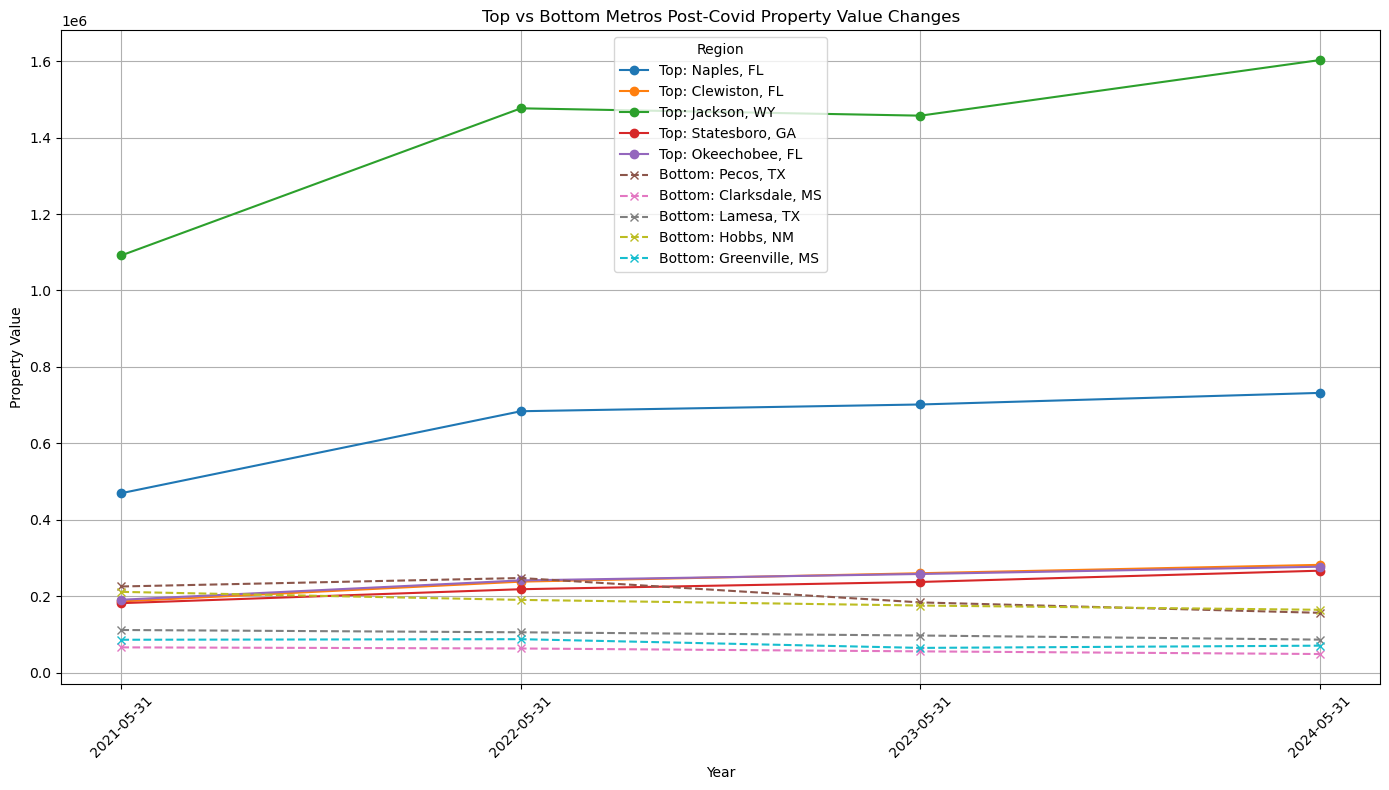

In [ ]:
# Preparing the data for plotting
# Dates as rows to create the time series
top_plot_data = top_post_covid.set_index('RegionName').transpose()
bottom_plot_data = bottom_post_covid.set_index('RegionName').transpose()

# Creating the plot
plt.figure(figsize=(14, 8))

# Plotting top Post-Covid change metros
for column in top_plot_data.columns:
    plt.plot(top_plot_data.index, top_plot_data[column], marker='o', label=f'Top: {column}')

# Plotting bottom Post-Covid change metros
for column in bottom_plot_data.columns:
    plt.plot(bottom_plot_data.index, bottom_plot_data[column], marker='x', linestyle='--', label=f'Bottom: {column}')

plt.title('Top vs Bottom Metros Post-Covid Property Value Changes')
plt.xlabel('Year')
plt.ylabel('Property Value')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary

Conducted an inital review of data available for the Zillow Home Value Index (ZHVI) (a propritary Home Sales metric) for Single Family Homes.  There is monthly data going back 20 years, however I limited a scope to the past 10 years of annual data, between May 2015 and May 2024.

Data is available at various scales, including: Metro, State, County, City, Zip Code, and Neighborhood.  Data Exploration started at the widest appature, the Metro Area, so that drill-down analysis can occur as a next step.

The growth rate was calculated for 10 years, pre-Covid (2015-2020), and post-covid (2021-2024).  The Metro Regions were then plotted for top and bottom five metros.

Although the ranked list of metros by percent change is interesting on the shorter time scales, the 10-year timeframe visually demonstrates areas of opporytunity for drilling into the data.  Metro regions for 'Clewiston, FL' and 'Okeechobee, FL' apprea in the top 5 growth charts for the 10-year and post-Covid changes and so could be interesting for further evaluation.

Next steps might include:
1. drilling down on the highest growing Metro Regions to determine which counties, zip codes and netghborhoods within those metro areas provide the best home value growth.  
2. The Pre/Post Covid analysis may be interesting on lower geographies and possibly with more data points at the zoomed in timeframes (eg: monthly vs annual).
3. SizeRank was filtered out of the dataset.  It may be interesting to evaluate that data point for its relationship to the highest growth home values.